In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import save_model

In [5]:
images = []
genders = []

for image in os.listdir('../data/UTKFace_resized_childfree_96'):
    split = image.split('_')
    if len(split) != 4:
        print(image)
        print(split)
        continue

    genders.append(int(split[1]))
    images.append(Image.open('../data/UTKFace_resized_childfree_96/' + image))

61_1_20170109142408075.jpg.chip.jpg
['61', '1', '20170109142408075.jpg.chip.jpg']


In [6]:
images = pd.Series(list(images), name = 'Images')
genders = pd.Series(list(genders), name = 'Genders')
df = pd.concat([images, genders], axis=1)

In [7]:
df.head(10)

,Images,Genders
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
5,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
6,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
7,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
8,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
9,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0


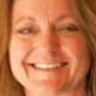

1


In [8]:
display(df['Images'][1])
print(df['Genders'][1])

/tmp/ipykernel_5613/2837118022.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Genders'], kde=True, bins=5)


<Axes: xlabel='Genders', ylabel='Density'>

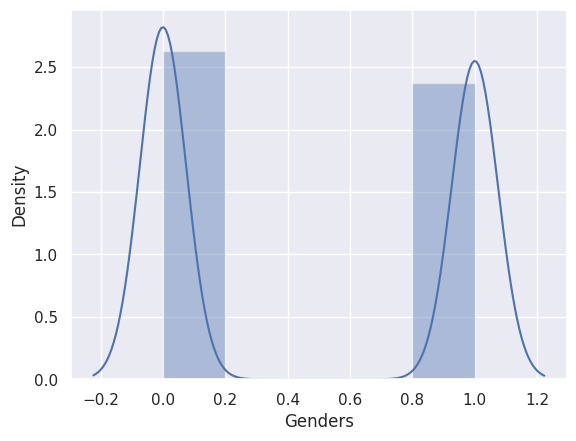

In [9]:
sns.set_theme()
sns.distplot(df['Genders'], kde=True, bins=5)

In [10]:
x = []
y = []

for i in range(len(df)):
    df['Images'].iloc[i] = df['Images'].iloc[i].resize((96,96))
    ar = np.asarray(df['Images'].iloc[i])
    x.append(ar)
    gender = [int(df['Genders'].iloc[i])]
    y.append(gender)
x = np.array(x)

/tmp/ipykernel_5613/2875938608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((96,96))
/tmp/ipykernel_5613/2875938608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((96,96))
/tmp/ipykernel_5613/2875938608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((96,96))
/tmp/ipyke

In [11]:
df.head(10)

,Images,Genders
0,<PIL.Image.Image image mode=RGB size=96x96 at ...,0
1,<PIL.Image.Image image mode=RGB size=96x96 at ...,1
2,<PIL.Image.Image image mode=RGB size=96x96 at ...,1
3,<PIL.Image.Image image mode=RGB size=96x96 at ...,0
4,<PIL.Image.Image image mode=RGB size=96x96 at ...,0
5,<PIL.Image.Image image mode=RGB size=96x96 at ...,1
6,<PIL.Image.Image image mode=RGB size=96x96 at ...,0
7,<PIL.Image.Image image mode=RGB size=96x96 at ...,0
8,<PIL.Image.Image image mode=RGB size=96x96 at ...,1
9,<PIL.Image.Image image mode=RGB size=96x96 at ...,0


In [12]:
y_gender = df['Genders']

x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.2, stratify=y_gender)

In [13]:
gen_model = Sequential()
gen_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(96, 96, 3)))
gen_model.add(MaxPooling2D((2,2)))
gen_model.add(Conv2D(64, (3,3), activation='relu'))
gen_model.add(MaxPooling2D((2,2)))
gen_model.add(Conv2D(128, (3,3), activation='relu'))
gen_model.add(MaxPooling2D((2,2)))
gen_model.add(Flatten())
gen_model.add(Dense(64, activation='relu'))
gen_model.add(Dropout(0.5))
gen_model.add(Dense(1, activation='sigmoid'))
gen_model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

2023-11-09 01:06:09.107242: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-09 01:06:09.111922: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-09 01:06:09.112131: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [14]:
datagen = ImageDataGenerator(rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train2 = datagen.flow(x_train_gender, y_train_gender, batch_size=64)

In [17]:
test2 = test_datagen.flow(x_test_gender, y_test_gender, batch_size=64)

In [18]:
history2 = gen_model.fit(train2, epochs=20, shuffle=True, validation_data=test2, verbose=1)

Epoch 1/20


2023-11-09 01:06:10.032930: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-09 01:06:10.162148: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-09 01:06:10.299543: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-09 01:06:10.905838: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f947c450e20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-09 01:06:10.905869: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2023-11-09 01:06:10.908840: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-09 01:06:10.956558: I ./tensorflow/compiler/jit/

172/172 [==============================] - 12s 56ms/step - loss: 0.6173 - accuracy: 0.6625 - val_loss: 0.5297 - val_accuracy: 0.7541
Epoch 2/20
172/172 [==============================] - 9s 55ms/step - loss: 0.5054 - accuracy: 0.7688 - val_loss: 0.4200 - val_accuracy: 0.8237
Epoch 3/20
172/172 [==============================] - 10s 57ms/step - loss: 0.4554 - accuracy: 0.7987 - val_loss: 0.3815 - val_accuracy: 0.8390
Epoch 4/20
172/172 [==============================] - 11s 62ms/step - loss: 0.4159 - accuracy: 0.8211 - val_loss: 0.3666 - val_accuracy: 0.8408
Epoch 5/20
172/172 [==============================] - 11s 62ms/step - loss: 0.3866 - accuracy: 0.8332 - val_loss: 0.3282 - val_accuracy: 0.8630
Epoch 6/20
172/172 [==============================] - 9s 55ms/step - loss: 0.3751 - accuracy: 0.8434 - val_loss: 0.3038 - val_accuracy: 0.8787
Epoch 7/20
172/172 [==============================] - 10s 57ms/step - loss: 0.3577 - accuracy: 0.8494 - val_loss: 0.3254 - val_accuracy: 0.8627
Epoch

In [19]:
save_model(gen_model, '../../models/model_gen.model')
gen_model.save_weights('../../models/weights_gen.h5')

INFO:tensorflow:Assets written to: ../../models/model_gen.model/assets


INFO:tensorflow:Assets written to: ../../models/model_gen.model/assets
